> This NB contains all the code for preprocessing and saving the datasets. Originally used in June24, copied here for reference

In [1]:
import numpy as np
import pandas as pd
import time
import json

from preprocessing import *

## Loading in the data

In [2]:
all_pids = ['P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108', 'P109', 'P110', 'P111', 'P112', 'P114', 'P115', 'P116', 'P118', 'P119', 'P121', 'P122', 'P123', 'P124', 'P125', 'P126', 'P127', 'P128', 'P131', 'P132', 'P004', 'P005', 'P006', 'P008', 'P010', 'P011']
all_gesture_types = ['pan', 'delete', 'close', 'select-single', 'rotate', 'zoom-in', 'zoom-out', 'open', 'move', 'duplicate']
all_gesture_nums = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

CHOSEN_PID = "P005"

In [3]:
#brc_data_save_path = 'D:\\Kai_MetaGestureClustering_24\\saved_datasets\\filtered_datasets\\'
laptop_data_save_path = 'C:\\Users\\kdmen\\Box\\Meta_Gesture_2024\\saved_datasets'
full_filesave_path = laptop_data_save_path+'\\segraw_EMG_allgestures_allusers.json'

print("Loading")
start_time = time.time()
with open(full_filesave_path, 'r') as f:
    loaded_dict = json.load(f)
end_time = time.time()
print(f"Completed in {end_time - start_time}s")

Loading
Completed in 70.50807118415833s


In [4]:
gesture = loaded_dict[CHOSEN_PID]["pan"]["5"]["EMG"]

In [5]:
print(type(gesture))

<class 'list'>


In [6]:
len(loaded_dict[CHOSEN_PID]["delete"]["5"]["EMG"])

16

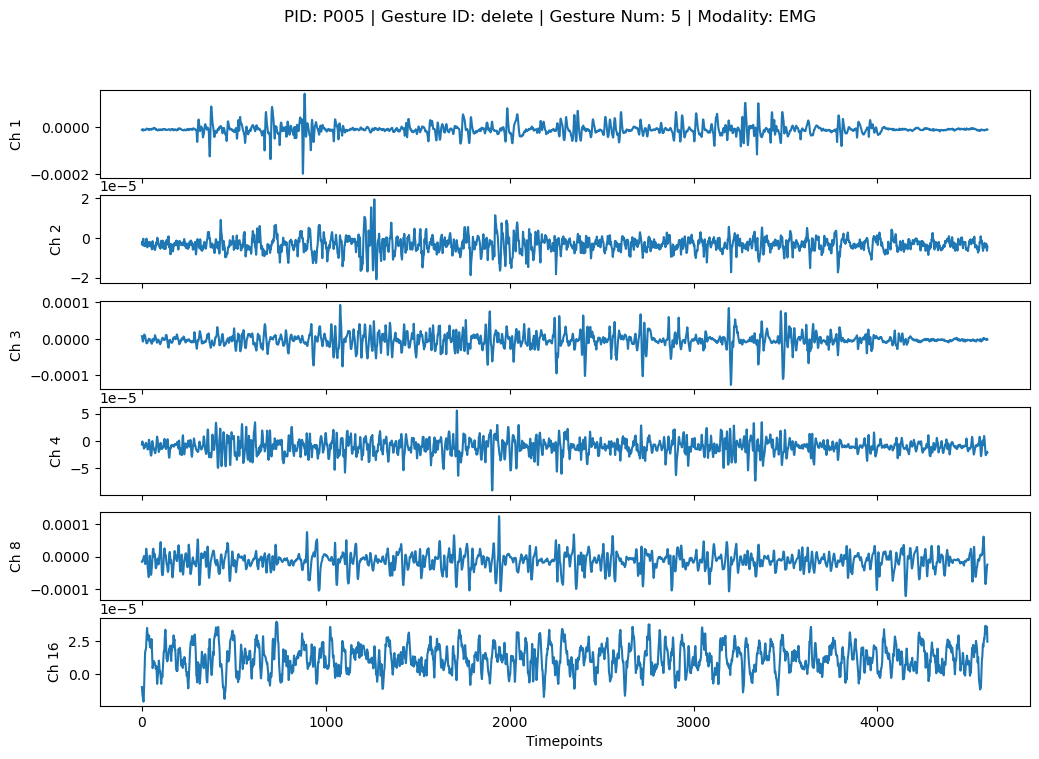

In [7]:
plot_selected_channels(loaded_dict, pid=CHOSEN_PID, gestureID="delete", gestureNum="5", modality="EMG", channels_to_plot=[1, 2, 3, 4, 8, 16])


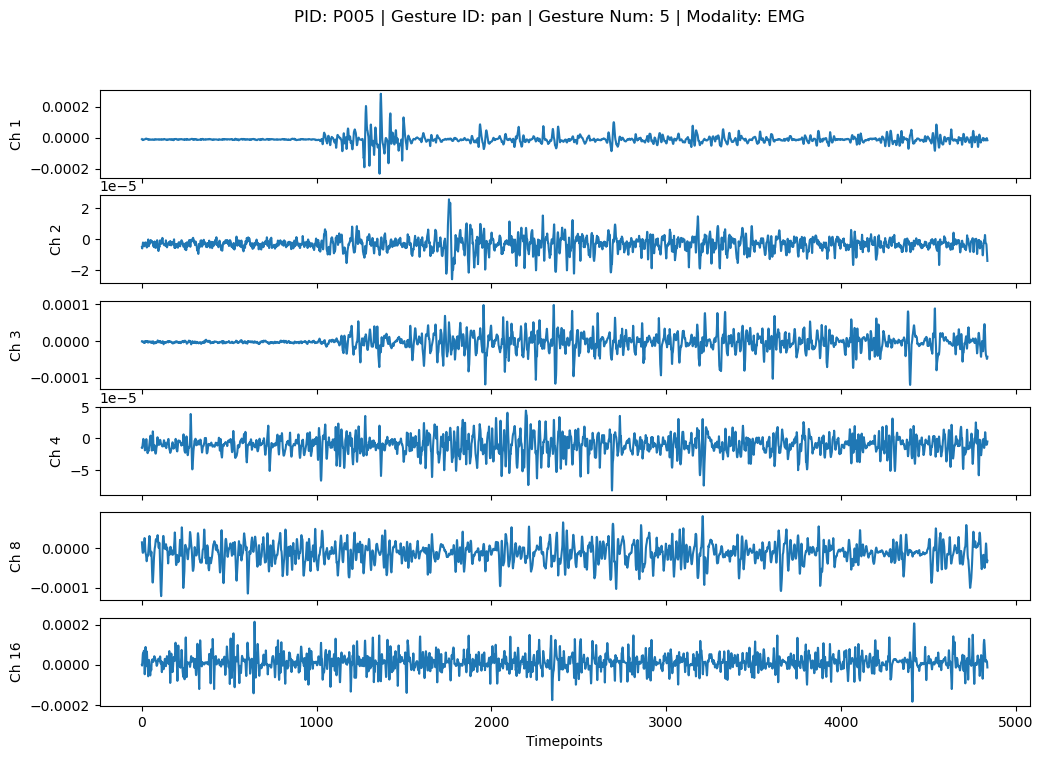

In [8]:
plot_selected_channels(loaded_dict, pid=CHOSEN_PID, gestureID="pan", gestureNum="5", modality="EMG", channels_to_plot=[1, 2, 3, 4, 8, 16])


## BPF and Mean subtract each column

In [9]:
bpf_ms_dict = apply_filter_to_nested_dict(loaded_dict, normalization_method="MEANSUBTRACTION", already_BPFd=False)


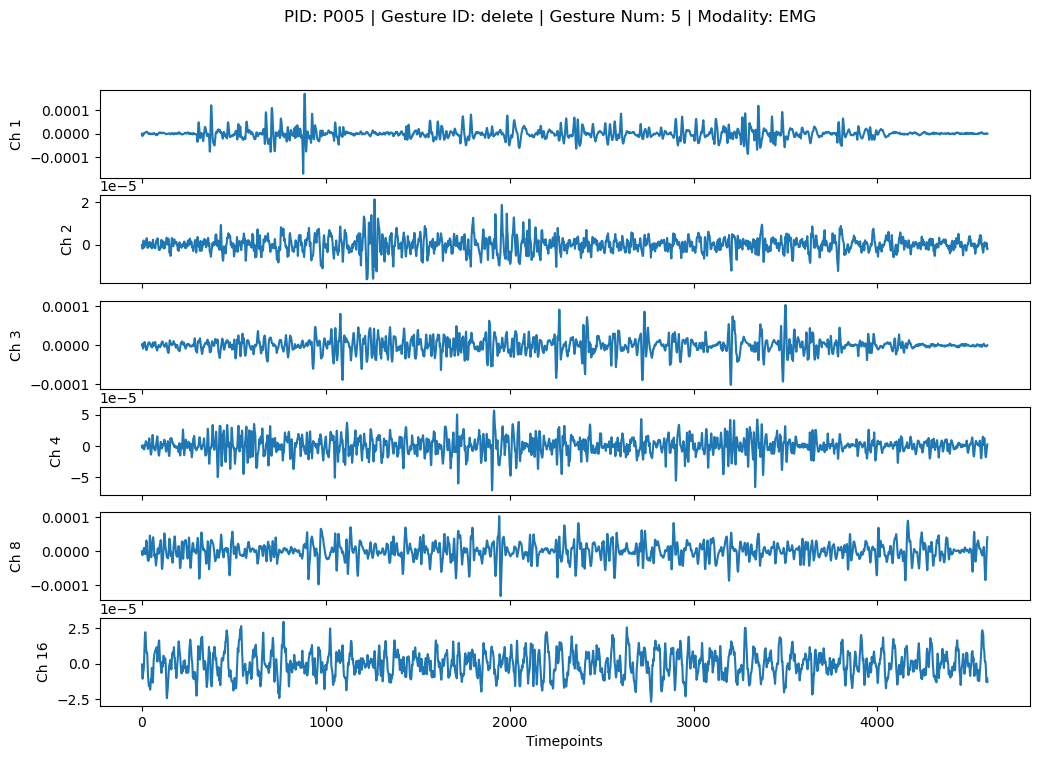

In [10]:
plot_selected_channels(bpf_ms_dict, pid=CHOSEN_PID, gestureID="delete", gestureNum="5", modality="EMG", channels_to_plot=[1, 2, 3, 4, 8, 16])


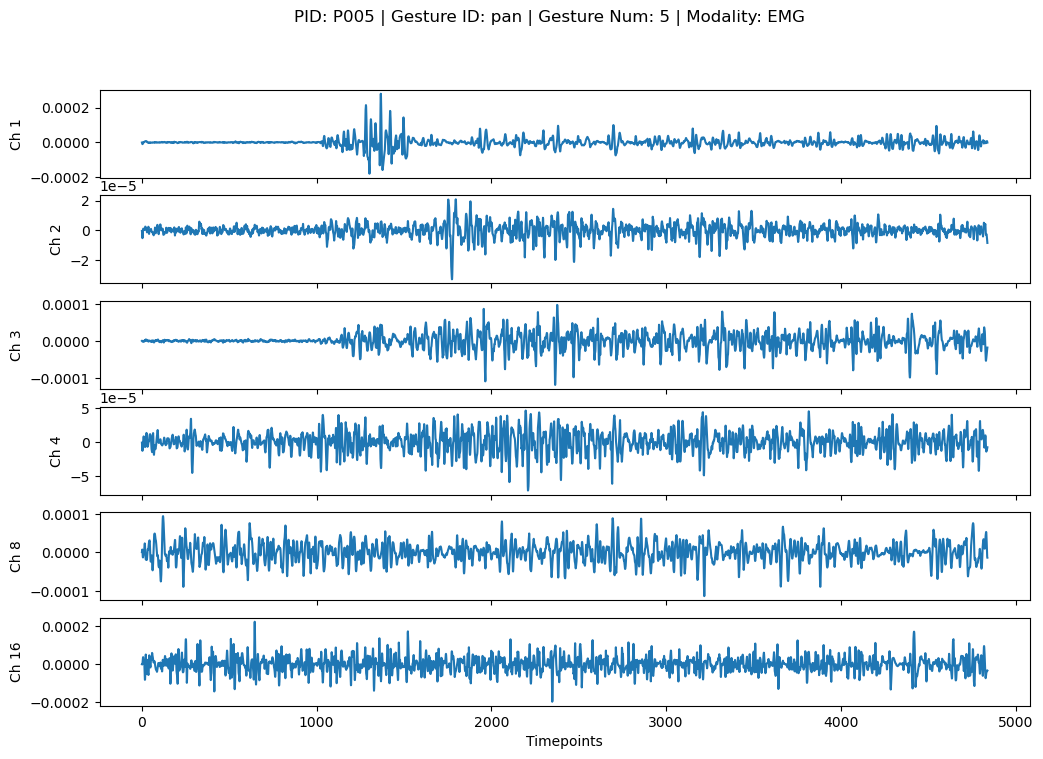

In [11]:
plot_selected_channels(bpf_ms_dict, pid=CHOSEN_PID, gestureID="pan", gestureNum="5", modality="EMG", channels_to_plot=[1, 2, 3, 4, 8, 16])


## Normalize each gesture such that std=1

In [12]:
normalized_dict = normalize_gestures_by_std(bpf_ms_dict)


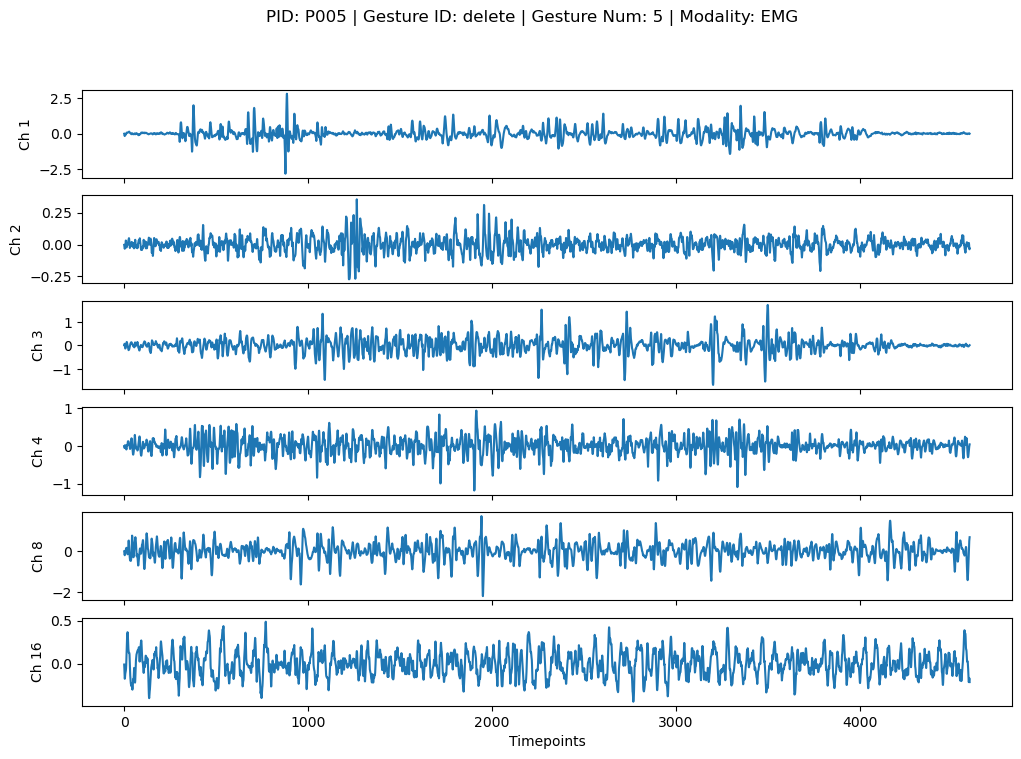

In [13]:
plot_selected_channels(normalized_dict, pid=CHOSEN_PID, gestureID="delete", gestureNum="5", modality="EMG", channels_to_plot=[1, 2, 3, 4, 8, 16])


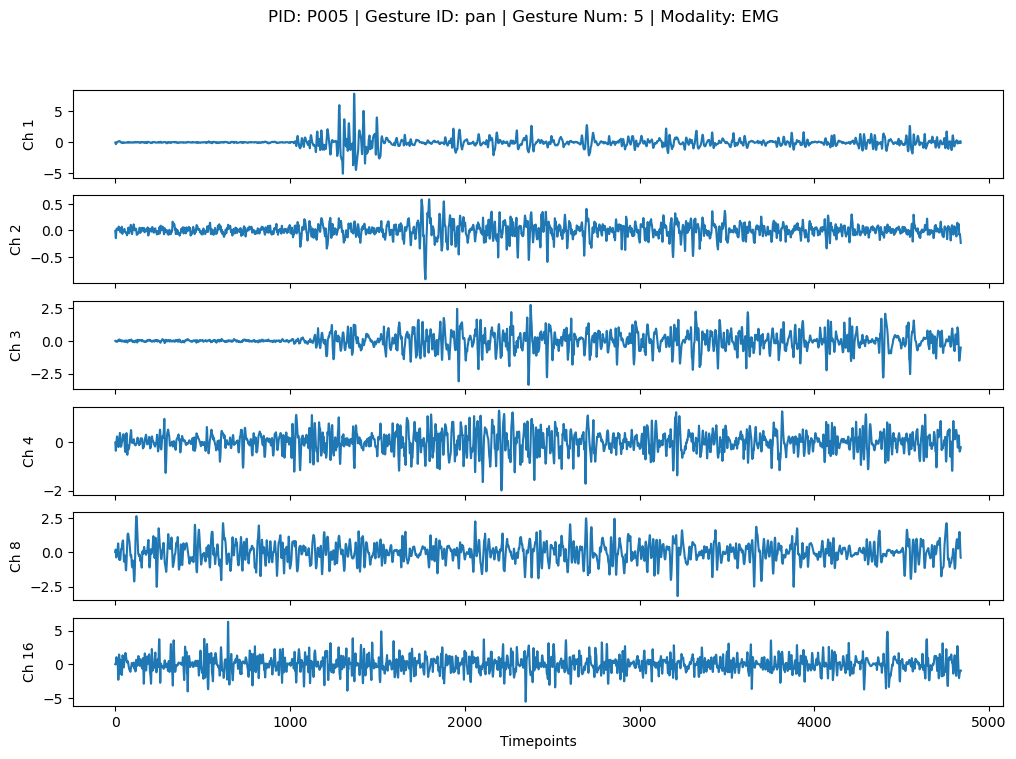

In [14]:
plot_selected_channels(normalized_dict, pid=CHOSEN_PID, gestureID="pan", gestureNum="5", modality="EMG", channels_to_plot=[1, 2, 3, 4, 8, 16])


In [15]:
assert(False)

AssertionError: 

In [16]:
full_filesave_path = laptop_data_save_path+'\\ppdsegraw_allEMG.json'

# Save the dict to a JSON file
with open(full_filesave_path, 'w') as f:
    json.dump(normalized_dict, f)